# MASINSKO UCENJE PROJEKAT 2 - UNSUPERVISED LEARNING

### Cilj projekta je da se redukuje broj boja koje se koriste u predstavljanju slike. Za potrebe projekta su uzete 2 slike, jedna gde su predstavljene svih 65536 razlicitih boja i druga je realna slika koja ne sadrzi svaku boju. Redukovanjem broja boja na manje od 50 bi se postigla znatna usteda u cuvanju i prenosu piksela sa slike. 

## 1. Importovanje biblioteka

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## 2. Ucitavanje i prikaz slika

In [2]:
image = cv2.imread("rainbow_rect.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image1 = cv2.imread("maghbaratoshoara_tabriz.jpeg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

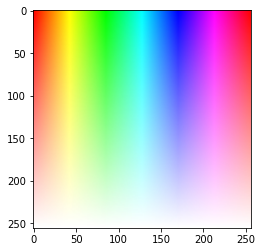

[[[255   1   1]
  [255   6   0]
  [254  12   0]
  ...
  [255   0  12]
  [255   0   6]
  [255   1   1]]

 [[255   1   1]
  [255   6   0]
  [255  13   1]
  ...
  [255   1  12]
  [255   1   7]
  [255   1   1]]

 [[255   3   2]
  [255   8   3]
  [255  13   2]
  ...
  [255   2  13]
  [255   2   7]
  [255   2   2]]

 ...

 [[255 253 254]
  [254 254 252]
  [255 255 255]
  ...
  [255 253 254]
  [255 253 254]
  [255 253 254]]

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [3]:
plt.imshow(image)
plt.show()
print(image)

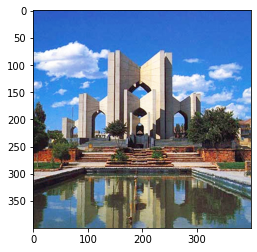

[[[ 49  90 196]
  [ 49  90 196]
  [ 49  90 196]
  ...
  [ 48 104 199]
  [ 48 104 201]
  [ 49 103 201]]

 [[ 48  91 196]
  [ 48  91 196]
  [ 48  91 196]
  ...
  [ 48 104 201]
  [ 48 102 200]
  [ 48 102 200]]

 [[ 49  92 197]
  [ 48  91 196]
  [ 48  91 196]
  ...
  [ 48 104 201]
  [ 49 103 201]
  [ 48 102 200]]

 ...

 [[ 61  57  45]
  [ 67  61  49]
  [ 70  64  48]
  ...
  [ 68 112 149]
  [ 68 112 149]
  [ 68 112 149]]

 [[ 66  63  48]
  [ 68  62  50]
  [ 68  65  48]
  ...
  [ 68 110 150]
  [ 68 112 151]
  [ 67 111 150]]

 [[ 71  68  53]
  [ 67  63  51]
  [ 69  66  47]
  ...
  [ 69 111 151]
  [ 68 112 151]
  [ 68 112 151]]]


In [4]:
plt.imshow(image1)
plt.show()
print(image1)

### Skaliranje slike na interval [0,1]

In [5]:
image_255 = image / 255
image1_255 = image1 / 255
print(image_255)
print(image1_255)

[[[1.         0.00392157 0.00392157]
  [1.         0.02352941 0.        ]
  [0.99607843 0.04705882 0.        ]
  ...
  [1.         0.         0.04705882]
  [1.         0.         0.02352941]
  [1.         0.00392157 0.00392157]]

 [[1.         0.00392157 0.00392157]
  [1.         0.02352941 0.        ]
  [1.         0.05098039 0.00392157]
  ...
  [1.         0.00392157 0.04705882]
  [1.         0.00392157 0.02745098]
  [1.         0.00392157 0.00392157]]

 [[1.         0.01176471 0.00784314]
  [1.         0.03137255 0.01176471]
  [1.         0.05098039 0.00784314]
  ...
  [1.         0.00784314 0.05098039]
  [1.         0.00784314 0.02745098]
  [1.         0.00784314 0.00784314]]

 ...

 [[1.         0.99215686 0.99607843]
  [0.99607843 0.99607843 0.98823529]
  [1.         1.         1.        ]
  ...
  [1.         0.99215686 0.99607843]
  [1.         0.99215686 0.99607843]
  [1.         0.99215686 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]


In [6]:
img_np = np.reshape(image_255, (-1, 3))
img_np1 = np.reshape(image1_255, (-1, 3))
print(img_np)
print(img_np1)

[[1.         0.00392157 0.00392157]
 [1.         0.02352941 0.        ]
 [0.99607843 0.04705882 0.        ]
 ...
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]]
[[0.19215686 0.35294118 0.76862745]
 [0.19215686 0.35294118 0.76862745]
 [0.19215686 0.35294118 0.76862745]
 ...
 [0.27058824 0.43529412 0.59215686]
 [0.26666667 0.43921569 0.59215686]
 [0.26666667 0.43921569 0.59215686]]


### Definisanje potrebnih funkcija za odredjivanje optimalnog broja klastera

In [7]:
def optimal_num_clusters_inertia(points, cluster_max):
    inertia = []
    for k in range(2, cluster_max):
        cluster = KMeans(n_clusters=k, n_init=5)
        labels = cluster.fit_predict(points)
        inertia.append(cluster.inertia_)

    plt.plot(range(2, cluster_max), inertia, 'bx-')
    plt.show()

In [8]:
def optimal_num_clusters_silhouette(points, cluster_max):
    silhouette = []
    for k in range(2, cluster_max):
        cluster = KMeans(n_clusters=k, n_init=5)
        labels = cluster.fit_predict(points)
        sil = silhouette_score(points, labels)
        silhouette.append(sil)

    plt.plot(range(2, cluster_max), silhouette, 'bx-')
    plt.show()

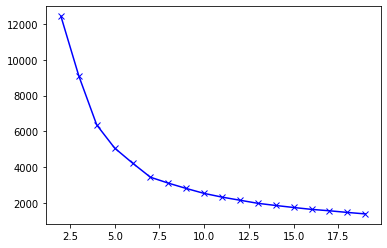

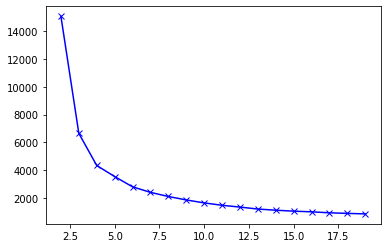

In [9]:
optimal_num_clusters_inertia(img_np, 20)
optimal_num_clusters_inertia(img_np1, 20)

#### Moze se primetiti da je primenom Elbow metode optimalan broj klastera za prvu sliku 7, dok je za drugu 4. Klasterizacija je vrsena pomocu KMeans algoritma.

### Definisanje pomocne funkcije za odredjivanje optimalnog broja klastera za Gaussian Mixture Model algoritam pomocu Bayesian Information Criteria (BIC score).

In [10]:
def optimal_num_clusters_gmm(points, cluster_max, cov_type):
    bic_score = []
    for k in range(2, cluster_max):
        gmm = GaussianMixture(n_components=k, covariance_type=cov_type)
        labels = gmm.fit_predict(points)
        bic_score.append(gmm.bic(points))

    plt.plot(range(2, cluster_max), bic_score, 'bx-')
    plt.show()

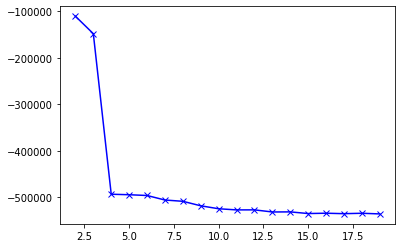

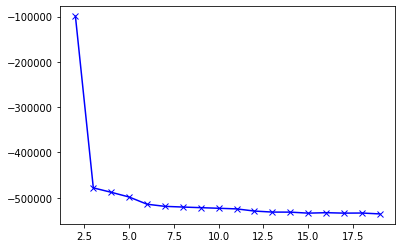

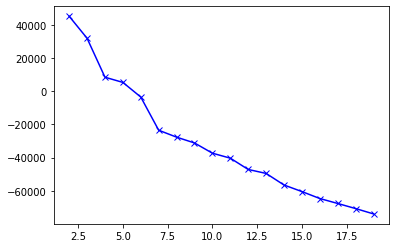

In [ ]:
optimal_num_clusters_gmm(img_np, 20, "full")
optimal_num_clusters_gmm(img_np, 20, "diag")
optimal_num_clusters_gmm(img_np, 20, "tied")

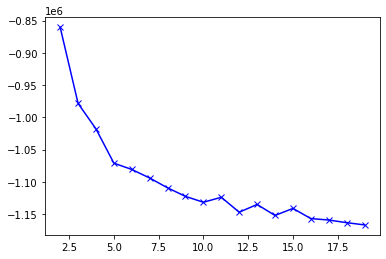

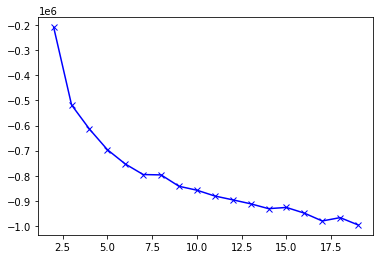

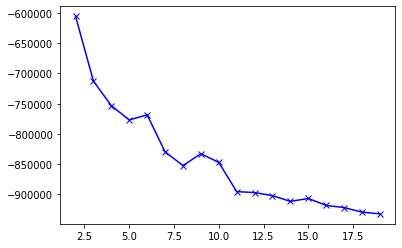

In [12]:
optimal_num_clusters_gmm(img_np1, 20, "full")
optimal_num_clusters_gmm(img_np1, 20, "diag")
optimal_num_clusters_gmm(img_np1, 20, "tied")

#### Za drugu sliku je optimalan broj klastera 15, 15 i 17

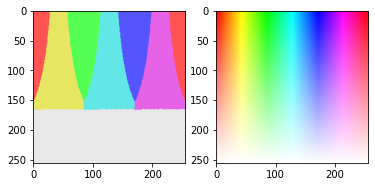

In [13]:
clustering_algorithm = KMeans(n_clusters=7, n_init=5)
labels = clustering_algorithm.fit_predict(img_np)
img_clustered = [clustering_algorithm.cluster_centers_[x] for x in labels]
img_clustered = np.reshape(img_clustered, (image.shape[0], image.shape[1], 3))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_clustered)
ax2.imshow(image)
plt.show()

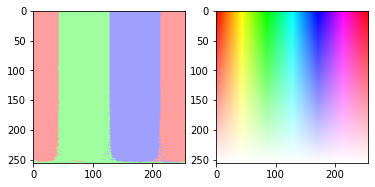

In [14]:
clustering_algorithm = GaussianMixture(n_components=3, covariance_type="full")
labels = clustering_algorithm.fit_predict(img_np)
img_clustered = [clustering_algorithm.means_[x] for x in labels]
img_clustered = np.reshape(img_clustered, (image.shape[0], image.shape[1], 3))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_clustered)
ax2.imshow(image)
plt.show()

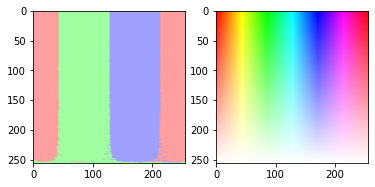

In [15]:
clustering_algorithm = GaussianMixture(n_components=3, covariance_type="diag")
labels = clustering_algorithm.fit_predict(img_np)
img_clustered = [clustering_algorithm.means_[x] for x in labels]
img_clustered = np.reshape(img_clustered, (image.shape[0], image.shape[1], 3))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_clustered)
ax2.imshow(image)
plt.show()

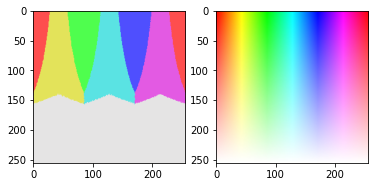

In [16]:
clustering_algorithm = GaussianMixture(n_components=7, covariance_type="tied")
labels = clustering_algorithm.fit_predict(img_np)
img_clustered = [clustering_algorithm.means_[x] for x in labels]
img_clustered = np.reshape(img_clustered, (image.shape[0], image.shape[1], 3))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_clustered)
ax2.imshow(image)
plt.show()

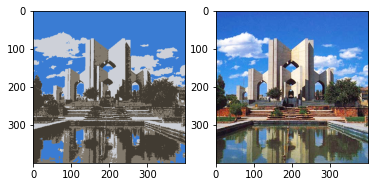

In [17]:
clustering_algorithm = KMeans(n_clusters=4, n_init=5)
labels = clustering_algorithm.fit_predict(img_np1)
img_clustered = [clustering_algorithm.cluster_centers_[x] for x in labels]
img_clustered = np.reshape(img_clustered, (image1.shape[0], image1.shape[1], 3))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_clustered)
ax2.imshow(image1)
plt.show()

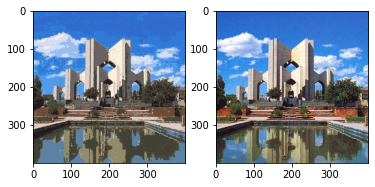

In [18]:
clustering_algorithm = GaussianMixture(n_components=15, covariance_type="full")
labels = clustering_algorithm.fit_predict(img_np1)
img_clustered = [clustering_algorithm.means_[x] for x in labels]
img_clustered = np.reshape(img_clustered, (image1.shape[0], image1.shape[1], 3))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_clustered)
ax2.imshow(image1)
plt.show()

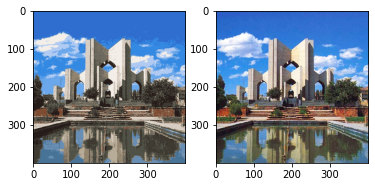

In [19]:
clustering_algorithm = GaussianMixture(n_components=15, covariance_type="diag")
labels = clustering_algorithm.fit_predict(img_np1)
img_clustered = [clustering_algorithm.means_[x] for x in labels]
img_clustered = np.reshape(img_clustered, (image1.shape[0], image1.shape[1], 3))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_clustered)
ax2.imshow(image1)
plt.show()

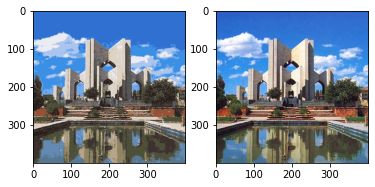

In [20]:
clustering_algorithm = GaussianMixture(n_components=17, covariance_type="tied")
labels = clustering_algorithm.fit_predict(img_np1)
img_clustered = [clustering_algorithm.means_[x] for x in labels]
img_clustered = np.reshape(img_clustered, (image1.shape[0], image1.shape[1], 3))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_clustered)
ax2.imshow(image1)
plt.show()

### Na sledecem primeru je dato kako izgleda slika kada se klasterizuje sa 50 klastera, radi ilustracije koliko se malo razlikuje klasterizovana slika u odnosu na realnu sliku.

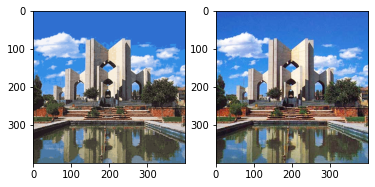

In [21]:
clustering_algorithm = GaussianMixture(n_components=50, covariance_type="tied")
labels = clustering_algorithm.fit_predict(img_np1)
img_clustered = [clustering_algorithm.means_[x] for x in labels]
img_clustered = np.reshape(img_clustered, (image1.shape[0], image1.shape[1], 3))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_clustered)
ax2.imshow(image1)
plt.show()

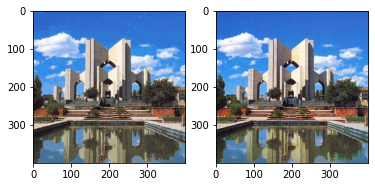

In [22]:
clustering_algorithm = GaussianMixture(n_components=50, covariance_type="full")
labels = clustering_algorithm.fit_predict(img_np1)
img_clustered = [clustering_algorithm.means_[x] for x in labels]
img_clustered = np.reshape(img_clustered, (image1.shape[0], image1.shape[1], 3))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_clustered)
ax2.imshow(image1)
plt.show()

#### To je potvrdjeno i merom razlike izmedju dve slike, gde se proseku jedan RGB piksel razlikuje za ukupno 13.32 od realne slike. Mera je norma razlike vektora piksela

In [38]:
print(np.sum(np.linalg.norm(image1-img_clustered*255, axis=2)) / (image1.shape[0]*image1.shape[1]))

13.321156836495705
